In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Expanding the dictionary for full view
pd.set_option('display.max_rows',None)      
pd.set_option('display.max_colwidth',None)
df_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [501]:
df = pd.read_csv("/Users/jh/Lending Club Case Study/loan.csv")
df_dict = pd.read_excel('/Users/jh/Lending Club Case Study/Data_Dictionary.xlsx')
df_new = df.copy()

#Calculating null percentages for all the columns
null_perc = df_new.isnull().mean()
col_to_drop = null_perc[null_perc>0.1].index

# Dropping Columns having more than 10% nulls
df_new['year'] = df_new['issue_d'].apply(lambda x:x.split('-')[1]).astype(int)
df_new = df_new.drop(columns=col_to_drop)
print(df_new.columns.to_list())
pd.set_option('display.max_columns',None)
df_new.describe()
df_new.head()


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'year']


/var/folders/pj/yjnv69794xvfk_mr93kqxql80000gn/T/ipykernel_35669/553003048.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/jh/Lending Club Case Study/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11


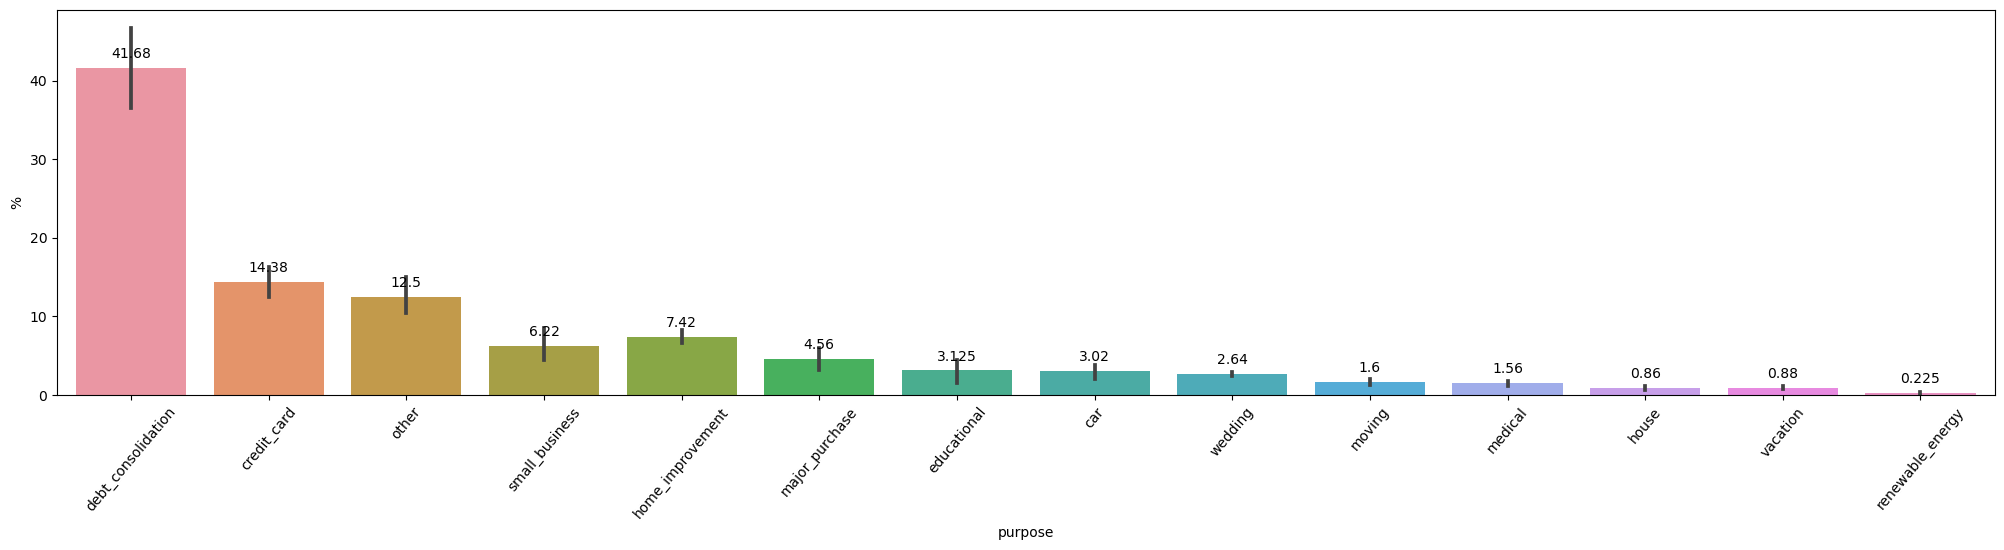

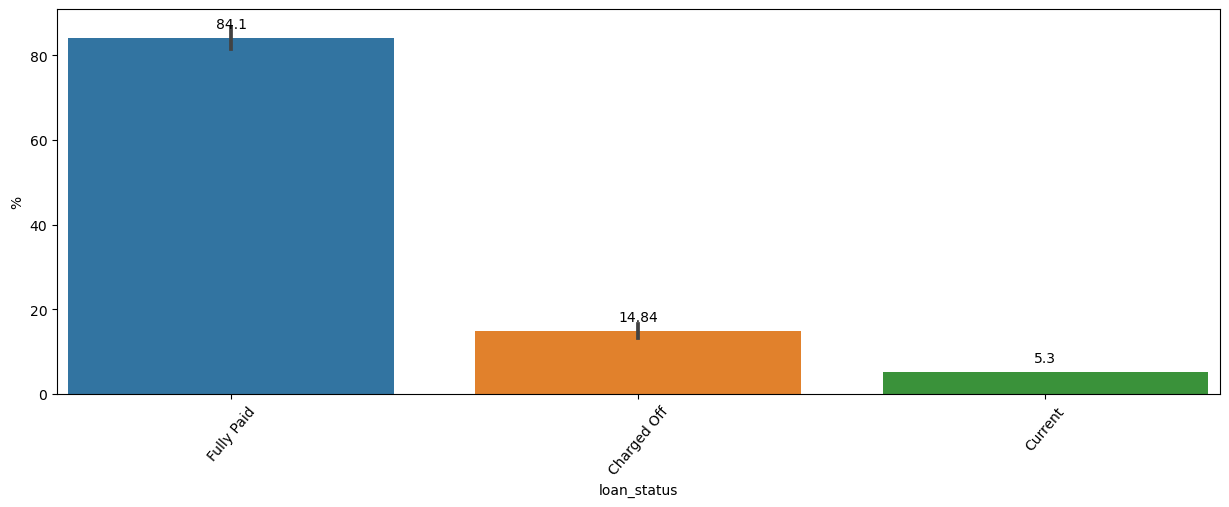

In [502]:
################# Purpose wise understanding #################
# Getting values in % for better presentation
a1=df_new.groupby(['year','purpose']).agg({'id':'nunique'}).reset_index()
b1=a1.groupby(['year']).agg({'id':'sum'})
c1=a1.merge(b1, on=['year'], how='left')
c1['%']= round((c1['id_x']/c1['id_y'])*100,1)
c1=c1.sort_values(by=['%'],ascending=False)

#PLotting the graph
plt.figure(figsize=(25,5))
ax=sns.barplot(data=c1, x=c1['purpose'], y=c1['%'])
plt.xticks(rotation=50)
    
 # Providing values over each bar plot   
for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)

ax.get_figure().savefig("img1.png")

################# Loan Status wise understanding #################
# Getting values in % for better presentation
a1=df_new.groupby(['year','loan_status']).agg({'id':'nunique'}).reset_index()
b1=a1.groupby(['year']).agg({'id':'sum'})
c1=a1.merge(b1, on=['year'], how='left')
c1['%']= round((c1['id_x']/c1['id_y'])*100,1)
c1=c1.sort_values(by=['%'],ascending=False)

#PLotting the graph
plt.figure(figsize=(15,5))
ax=sns.barplot(data=c1, x=c1['loan_status'], y=c1['%'])
plt.xticks(rotation=50)
    
 # Providing values over each bar plot   
for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)

ax.get_figure().savefig("img2.png")

1) 

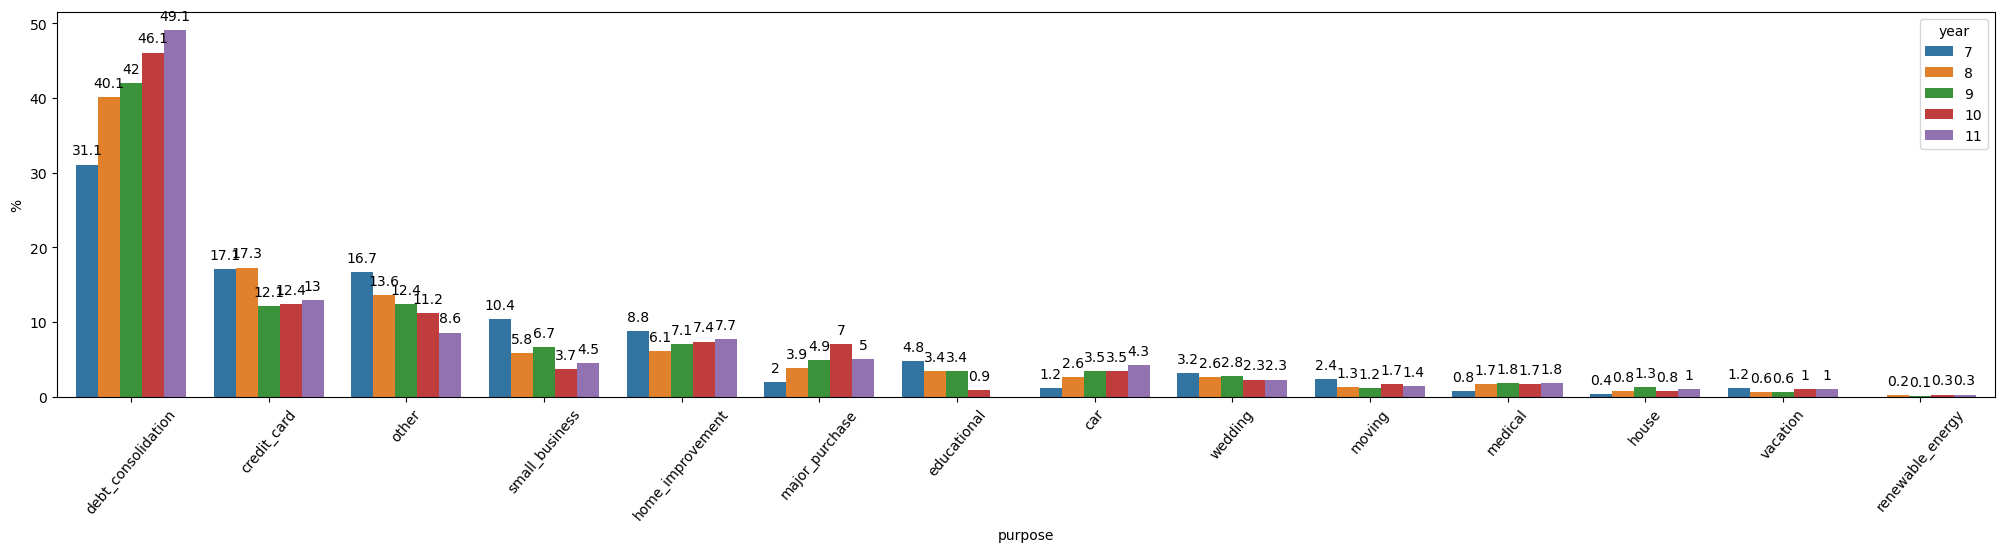

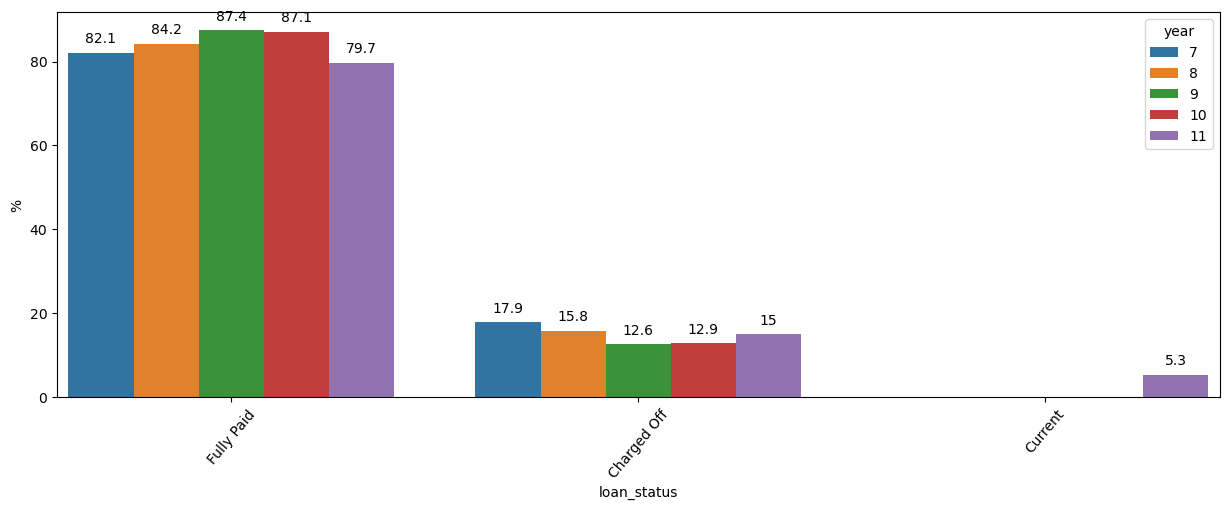

In [503]:
##################### Year Wise ################################

################# Purpose wise understanding #################
# Getting values in % for better presentation
a1=df_new.groupby(['year','purpose']).agg({'id':'nunique'}).reset_index()
b1=a1.groupby(['year']).agg({'id':'sum'})
c1=a1.merge(b1, on=['year'], how='left')
c1['%']= round((c1['id_x']/c1['id_y'])*100,1)
c1=c1.sort_values(by=['%'],ascending=False)

#PLotting the graph
plt.figure(figsize=(25,5))
ax=sns.barplot(data=c1, x=c1['purpose'], y=c1['%'], hue=c1['year'])
plt.xticks(rotation=50)
    
 # Providing values over each bar plot   
for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)

################# Loan Status wise understanding #################
# Getting values in % for better presentation
a1=df_new.groupby(['year','loan_status']).agg({'id':'nunique'}).reset_index()
b1=a1.groupby(['year']).agg({'id':'sum'})
c1=a1.merge(b1, on=['year'], how='left')
c1['%']= round((c1['id_x']/c1['id_y'])*100,1)
c1=c1.sort_values(by=['%'],ascending=False)

#PLotting the graph
plt.figure(figsize=(15,5))
ax=sns.barplot(data=c1, x=c1['loan_status'], y=c1['%'], hue=c1['year'])
plt.xticks(rotation=50)
    
 # Providing values over each bar plot   
for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)

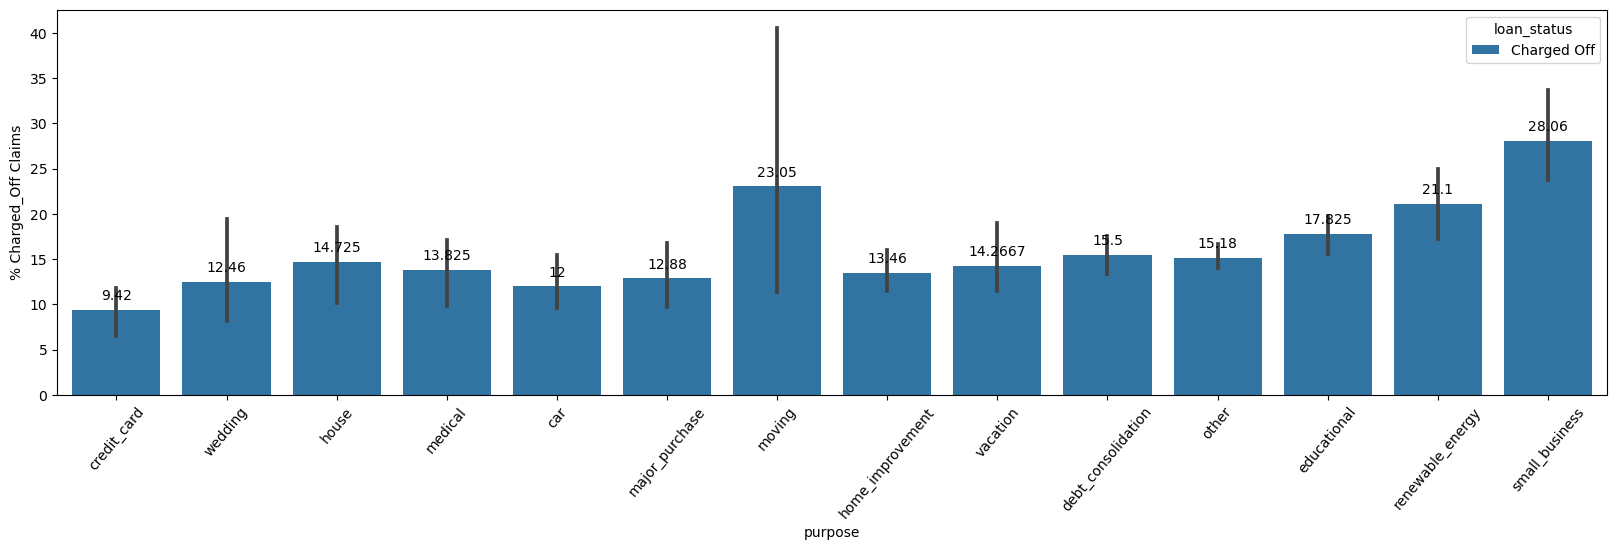

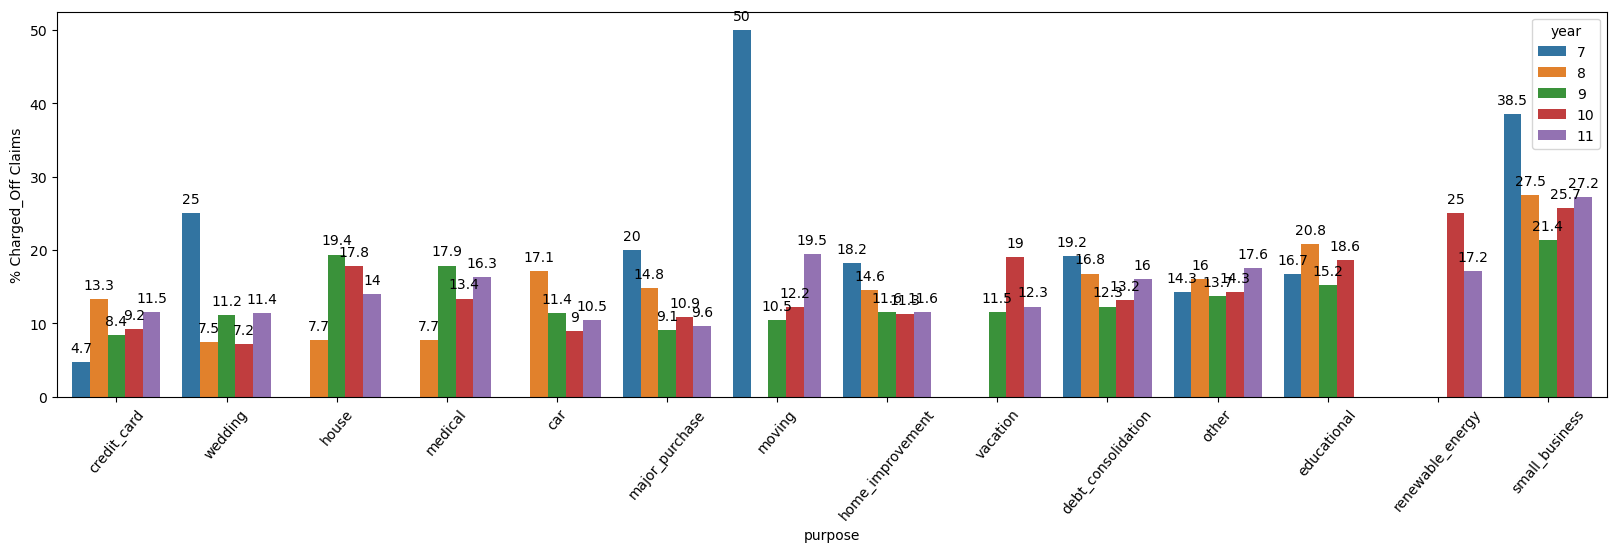

In [504]:
### Purpose, Loan Status wise understanding for "Charged Off"

# Purpose Wise Getting values in % for better presentation

a4=df_new.groupby(['year','purpose','loan_status']).agg({'id':'nunique'}).reset_index()
b4=a4.groupby(['year','purpose']).agg({'id':'sum'})
c4=a4.merge(b4, on=['year','purpose'], how='left')
c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
c4=c4[c4['loan_status']=='Charged Off']
c4=c4.sort_values(by=['%'],ascending=True)


# Plotting the graph without year  
plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['purpose'], y=c4['%'], hue=c4['loan_status'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')
    
for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)



#Plotting the graph with year
plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['purpose'], y=c4['%'], hue=c4['year'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')
    
for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)



1) Small Business, Moving, Renewable energy, educational purpose claims are contributing to around ~90% of the Charged off accounts
2) Small Business pupose claims are contributing higher with 28.03%
3) On the Year on Year Claims, we could see a sharp decline in the small business & Renewable energy claims but more for the moving purposes by an increment of ~2-5%. Educational Claims are not having any trend or seasonality.

# Focusing only Charged Off accounts for Small Business, Moving, Renewable Energy & Educational Purposes data for L2 analysis since these are contributing to 90% of the charged off accounts.

In [505]:
lst = ['renewable_energy','small_business','moving','educational']
df_new_1 = df_new[df_new['purpose'].isin(lst)]
df_new_1 = df_new_1[df_new_1['loan_status']=='Charged Off']
df_new_1['int_rate'] = df_new_1['int_rate'].str.replace("%","").astype(float)

#Categorising the interest rate values for better understanding
def interest_rate_cat(x):
    if x == 0:
        return '1) 0'
    elif 0 < x <= 5:
        return '2) 0-5%'
    elif 5 < x <= 10:
        return '3) 5-10%'
    elif 10 < x <= 15:
        return '4) 10-15%'
    elif 15 < x <= 20:
        return '5) 15-20%'
    elif 20 < x <= 25:
        return '6) 20-25%'
    elif x > 25:
        return '7) 25%+'
    else:
        return '8) Others'

df_new_1['interest_rate_cat'] = df_new_1['int_rate'].astype(float).apply(interest_rate_cat)
df_new_1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,interest_rate_cat
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1071795,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,6) 20-25%
68,1068906,1303528,8200,8200,8200.0,60 months,21.28,223.14,F,F2,autozone,4 years,RENT,75000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1068906,small_business,Small_Business Loan,912xx,CA,12.48,0,Jan-00,3,6,0,9012,73.90%,11,f,0.0,0.0,4173.57,4173.57,1525.83,2265.85,0.0,381.89,3.6000,Jun-13,223.14,Oct-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,6) 20-25%
175,1067364,1301744,10000,10000,10000.0,36 months,13.49,339.31,C,C1,Edgestone Real Estate,5 years,RENT,65000.0,Not Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1067364,small_business,Small Business Loan,927xx,CA,6.92,1,Dec-99,2,12,0,14292,69.50%,17,f,0.0,0.0,9270.84,9270.84,6799.56,2011.75,0.0,459.53,4.4878,Mar-14,339.31,Jul-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,4) 10-15%
220,1066798,1300982,9500,9500,9500.0,36 months,12.69,318.68,B,B5,San Diego Unified School District,< 1 year,MORTGAGE,52500.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1066798,moving,Moved to California,921xx,CA,23.54,0,Jul-99,2,14,0,23729,75.30%,42,f,0.0,0.0,7002.16,7002.16,5366.65,1635.51,0.0,0.00,0.0000,Nov-13,318.68,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,4) 10-15%
270,1063447,1296011,16000,16000,16000.0,60 months,13.49,368.08,C,C1,NaN,10+ years,RENT,35000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1063447,small_business,Small Business,274xx,NC,16.22,0,Jul-02,1,6,0,19184,58.50%,14,f,0.0,0.0,10343.32,10343.32,5147.59,3678.41,0.0,1517.32,15.1732,Jan-14,368.08,May-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,4) 10-15%


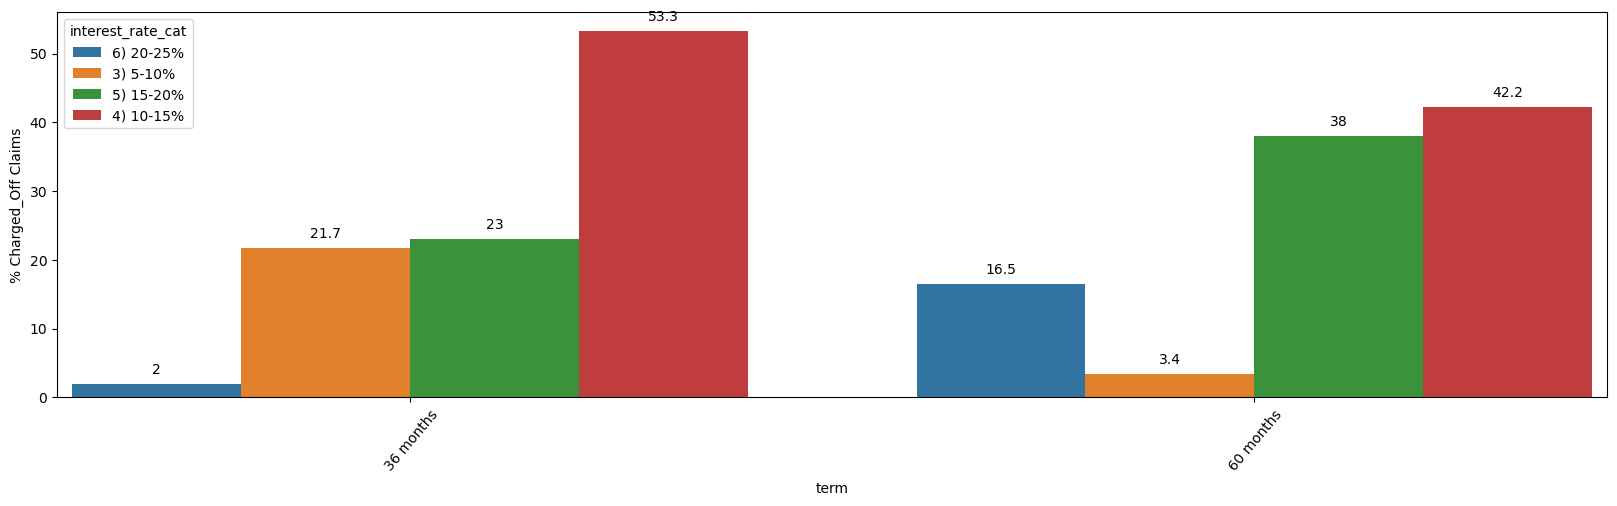

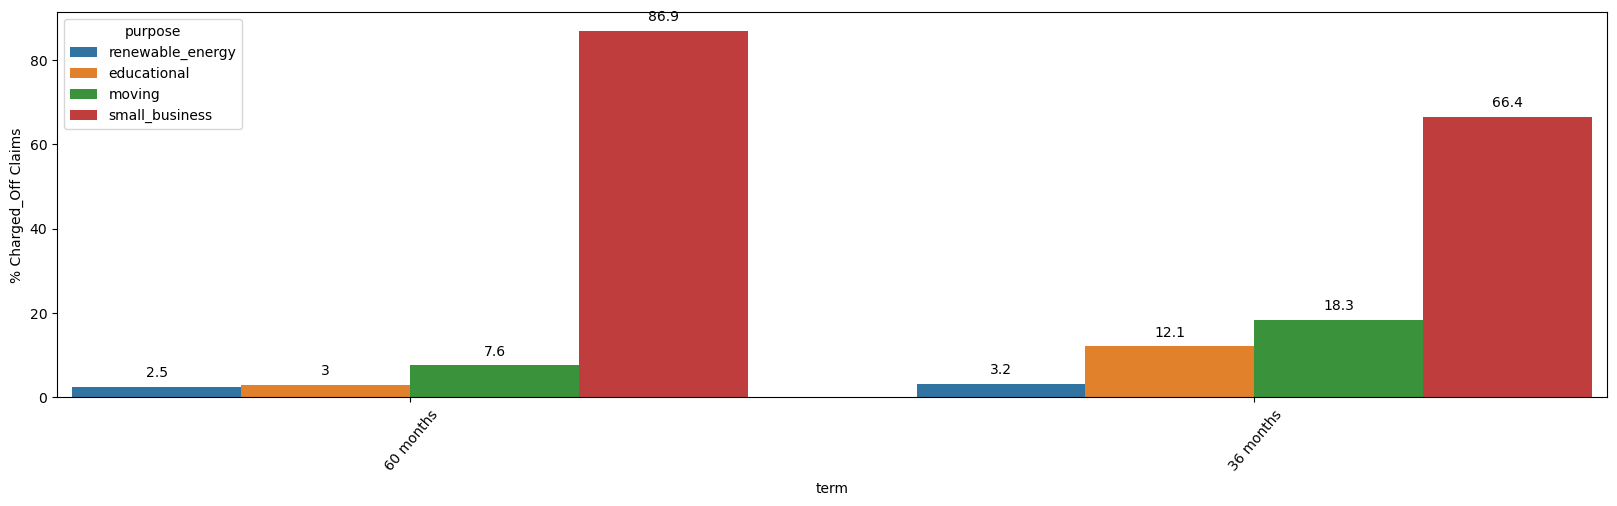

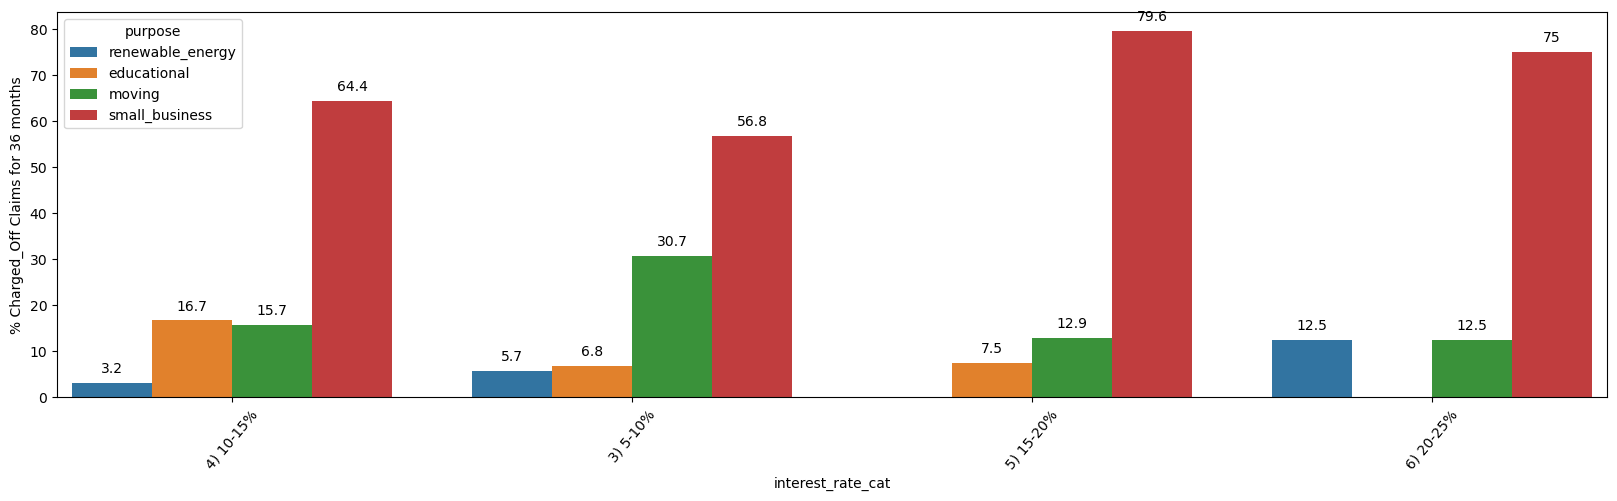

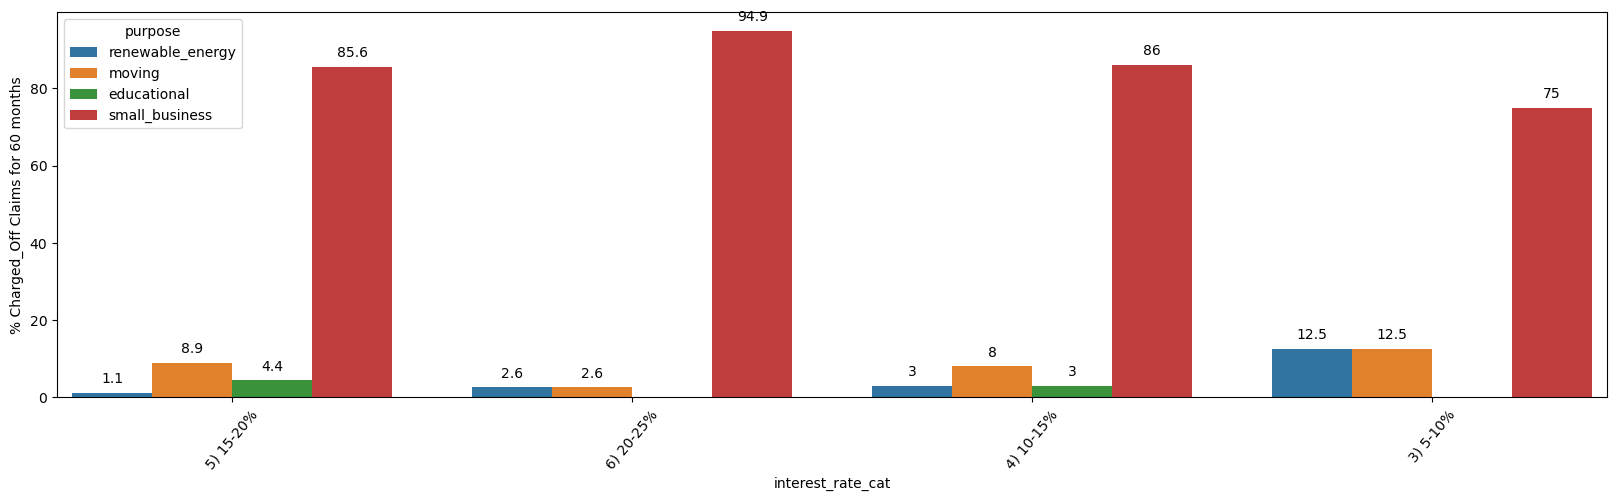

In [506]:
#Bivariant analysis on Interest_rate,term

a4=df_new_1.groupby(['term','interest_rate_cat']).agg({'id':'nunique'}).reset_index()
b4=a4.groupby(['term']).agg({'id':'sum'})
c4=a4.merge(b4, on=['term'], how='left')
c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
c4=c4.sort_values(by=['%'],ascending=True)

plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['term'], y=c4['%'], hue=c4['interest_rate_cat'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')

for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)


# Bivariant between Purpose & terms
    
a4=df_new_1.groupby(['purpose','term']).agg({'id':'nunique'}).reset_index()
b4=a4.groupby(['term']).agg({'id':'sum'})
c4=a4.merge(b4, on=['term'], how='left')
c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
c4=c4.sort_values(by=['%'],ascending=True)

plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['term'], y=c4['%'], hue=c4['purpose'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')

for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)


# Bivariant between Purpose & interest
lsts = [' 36 months',' 60 months']    

for i in lsts:
    a4=df_new_1[df_new_1['term']==i]    
    a4=a4.groupby(['purpose','interest_rate_cat']).agg({'id':'nunique'}).reset_index()
    b4=a4.groupby(['interest_rate_cat']).agg({'id':'sum'})
    c4=a4.merge(b4, on=['interest_rate_cat'], how='left')
    c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
    c4=c4.sort_values(by=['%'],ascending=True)

    plt.figure(figsize=(20,5))
    ax=sns.barplot(data=c4, x=c4['interest_rate_cat'], y=c4['%'], hue=c4['purpose'])
    plt.xticks(rotation=50)
    plt.ylabel("% Charged_Off Claims for"+i)

    for container in ax.containers:
        ax.bar_label(container, padding=5)
        ax.margins(x=0.01)

1) Percentage of defaulters are more for 60 months terms.
2) In both terms 36 & 60 months, 10-15% Interest Buckets are highly to default by 56.98% & 46.75%
3) On those who takes 36 months term based loans, 10-15% & 5-10% Buckets contribute around 80% of the defaulters.
4) Where as in 60 months tenure, 10-15% & 15-20% Buckets contribute around 80% of the defaulters.
5) Small Business & Educational purpose contribute 90% of claims for 36 & 60 months terms.
6) In 36 months, Small Business contribute an average of 67% Claims across all the interest buckets where 15-20% interest bucket contributes the highest with ~80%.
7) In 60 months small business contribute an average of 80% having 20-25% with the highest with 95%.

## Limiting the analysis by Focusing More on "Small business" purposes for "60 month" terms

In [507]:
df_new_2 = df_new_1[df_new_1['purpose']=='small_business']
df_new_2 = df_new_2[df_new_2['term']==' 60 months']
df_new_2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,interest_rate_cat
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1071795,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0.0,0.0,646.02,646.02,162.02,294.94,0.000000,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,6) 20-25%
68,1068906,1303528,8200,8200,8200.00000,60 months,21.28,223.14,F,F2,autozone,4 years,RENT,75000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1068906,small_business,Small_Business Loan,912xx,CA,12.48,0,Jan-00,3,6,0,9012,73.90%,11,f,0.0,0.0,4173.57,4173.57,1525.83,2265.85,0.000000,381.89,3.6000,Jun-13,223.14,Oct-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,6) 20-25%
270,1063447,1296011,16000,16000,16000.00000,60 months,13.49,368.08,C,C1,NaN,10+ years,RENT,35000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1063447,small_business,Small Business,274xx,NC,16.22,0,Jul-02,1,6,0,19184,58.50%,14,f,0.0,0.0,10343.32,10343.32,5147.59,3678.41,0.000000,1517.32,15.1732,Jan-14,368.08,May-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,4) 10-15%
300,1057001,1288555,30000,30000,28673.79652,60 months,12.42,673.72,B,B4,NaN,3 years,RENT,70000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1057001,small_business,Patent and manufacturing.,773xx,TX,0.94,0,Jul-06,0,7,0,1159,3.20%,14,f,0.0,0.0,17179.15,14854.83,8464.18,5679.62,33.686585,3001.66,30.0166,Oct-13,673.72,Feb-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,4) 10-15%
747,1052346,1283902,20000,20000,19975.00000,60 months,18.25,510.60,D,D5,St.Bernard Hospital,7 years,RENT,70000.0,Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1052346,small_business,Trading business,604xx,IL,18.41,0,Jul-02,1,12,0,10958,71.20%,18,f,0.0,0.0,22977.00,22948.46,13187.20,9767.18,0.000000,22.62,4.0716,Sep-15,510.60,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,5) 15-20%


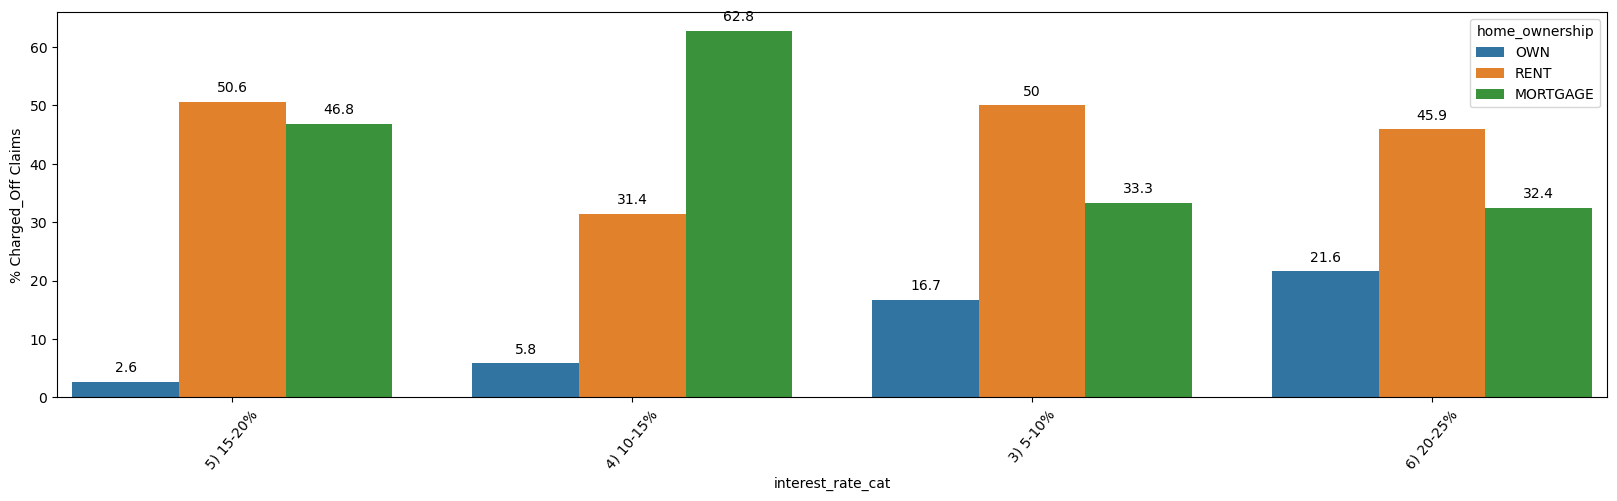

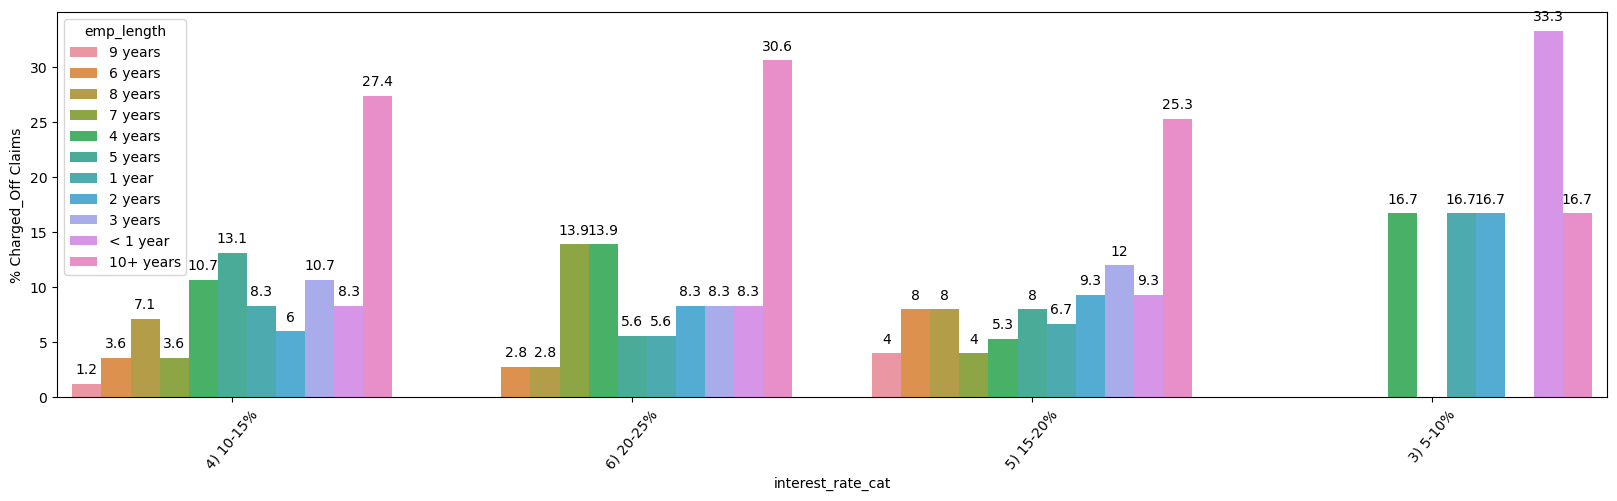

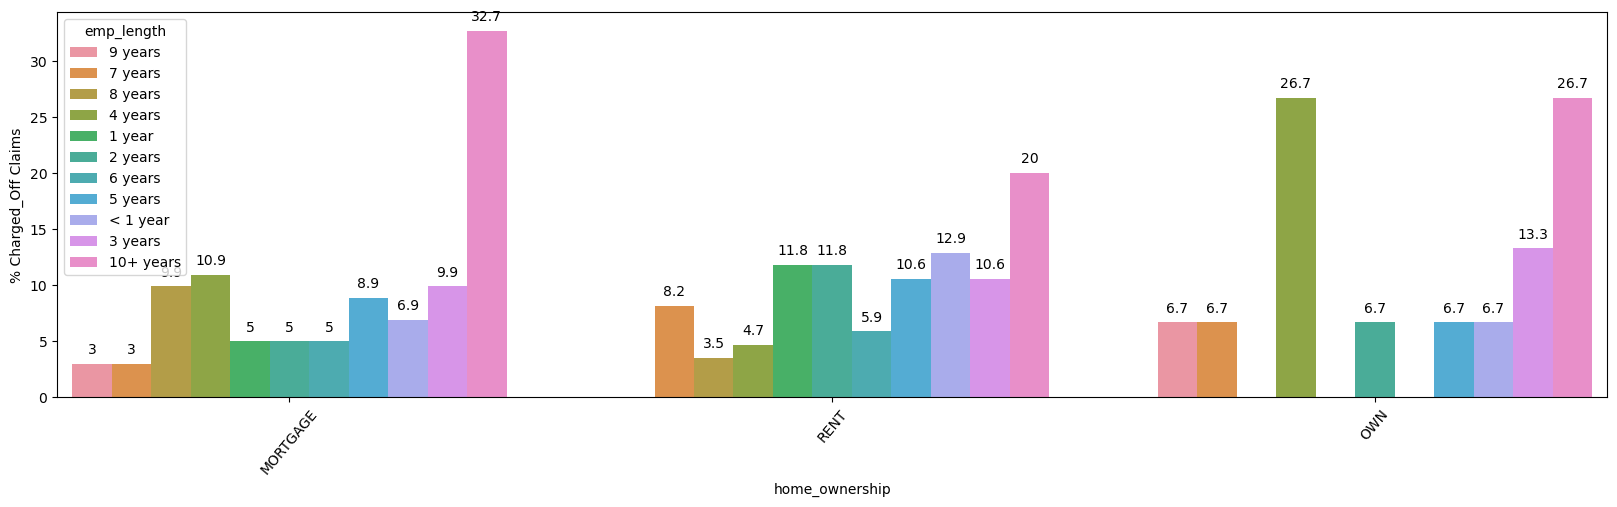

In [508]:
# Bivariant between interest & home_ownership
    
a4=df_new_2.groupby(['interest_rate_cat','home_ownership']).agg({'id':'nunique'}).reset_index()
b4=a4.groupby(['interest_rate_cat']).agg({'id':'sum'})
c4=a4.merge(b4, on=['interest_rate_cat'], how='left')
c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
c4=c4.sort_values(by=['%'],ascending=True)

plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['interest_rate_cat'], y=c4['%'], hue=c4['home_ownership'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')

for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)


# Bivariant between interest & emp_length
a4=df_new_2.groupby(['interest_rate_cat','emp_length']).agg({'id':'nunique'}).reset_index()
b4=a4.groupby(['interest_rate_cat']).agg({'id':'sum'})
c4=a4.merge(b4, on=['interest_rate_cat'], how='left')
c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
c4=c4.sort_values(by=['%'],ascending=True)

plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['interest_rate_cat'], y=c4['%'], hue=c4['emp_length'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')

for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)


# Bivariant between home_ownership & emp_length
a4=df_new_2.groupby(['home_ownership','emp_length']).agg({'id':'nunique'}).reset_index()
b4=a4.groupby(['home_ownership']).agg({'id':'sum'})
c4=a4.merge(b4, on=['home_ownership'], how='left')
c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
c4=c4.sort_values(by=['%'],ascending=True)

plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['home_ownership'], y=c4['%'], hue=c4['emp_length'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')

for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)

Major takeaya is on Small Business for 60 months tenure is :
1) People staying on Rent having employee experience of over 10+ are more prone to default.

# Drill down more on homeownership "RENT" & With Emp_lenght = "10+" for "Small business" purposes for "60 month" terms and for '15-20%' Interest Buckets for revelancy

In [509]:
df_new_3 = df_new_2[df_new_2['home_ownership']=='RENT']
df_new_3 = df_new_3[df_new_3['emp_length']=='10+ years']
df_new_3 = df_new_3[df_new_3['interest_rate_cat']=='5) 15-20%']

# Creating a new mertric for defining loan_amount + installment + salary
# 1)  Defining metric for loan_amount + salary
df_new_3['EMI_Consumption_perc'] = round(((df_new_3['installment']*12) / df_new_3['annual_inc']) * 100,2)


def Consumption_perc(x):
    if x == 0:
        return '1) 0'
    elif 0 < x <= 3:
        return '2) 0-3%'
    elif 3 < x <= 6:
        return '3) 3-6%'
    elif 6 < x <= 9:
        return '4) 6-9%'
    elif 9 < x <= 12:
        return '5) 9-12%'
    elif 12 < x <= 15:
        return '6) 12-15%'
    elif x > 15:
        return '7) 15%+'
    else:
        return '8) Others'

df_new_3['EMI_Consumption_perc_bucket'] = df_new_3['EMI_Consumption_perc'].astype(float).apply(Consumption_perc)

df_new_3.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,year,interest_rate_cat,EMI_Consumption_perc,EMI_Consumption_perc_bucket
2564,1034733,1264533,25000,25000,25000.00000,60 months,18.64,643.58,E,E1,NaN,10+ years,RENT,50000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1034733,small_business,Small Business Loan,917xx,CA,5.81,0,Nov-00,0,2,0,6054,96.10%,7,f,0.0,0.0,6453.66,6453.66,2154.63,2989.53,0.000000,1309.50,235.7100,Aug-12,643.58,Feb-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,5) 15-20%,15.45,7) 15%+
7137,886664,1102665,10400,10400,10375.00000,60 months,17.58,261.73,D,D4,C3 BUSINESS SOLUTIONS INC.,10+ years,RENT,85325.0,Verified,Sep-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=886664,small_business,opening new busines,900xx,CA,8.93,0,Apr-01,0,8,1,856,4.70%,11,f,0.0,0.0,466.98,465.86,0.00,0.00,0.000000,466.98,4.3900,NaN,0.00,Oct-11,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0,11,5) 15-20%,3.68,3) 3-6%
7806,875843,1083667,30000,23225,23034.73778,60 months,18.39,594.71,E,E2,Conifer Health Solutions,10+ years,RENT,57000.0,Verified,Sep-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=875843,small_business,Home Decor,926xx,CA,14.99,0,Jul-86,0,10,0,16056,69.80%,23,f,0.0,0.0,9446.03,9051.87,3696.83,4627.99,0.000000,1121.21,10.8300,Nov-12,594.71,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,5) 15-20%,12.52,6) 12-15%
8944,857547,1070018,24000,24000,23975.00000,60 months,17.49,602.81,D,D5,maxim integrated products,10+ years,RENT,60000.0,Verified,Aug-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=857547,small_business,get it started,972xx,OR,8.96,0,Mar-94,1,4,0,323,7%,17,f,0.0,0.0,3131.93,3128.69,768.09,1035.51,0.000000,1328.33,239.0994,Dec-11,602.81,Apr-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,5) 15-20%,12.06,6) 12-15%
13898,774216,976377,12000,12000,12000.00000,60 months,16.49,294.96,D,D3,Doctor Charles Dorato,10+ years,RENT,48000.0,Verified,Jun-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=774216,small_business,Small Business Loan,100xx,NY,18.63,0,Nov-88,0,9,0,11376,57.70%,18,f,0.0,0.0,7138.55,7138.55,3642.22,3451.38,44.951279,0.00,0.0000,Jul-13,30.19,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,11,5) 15-20%,7.37,4) 6-9%


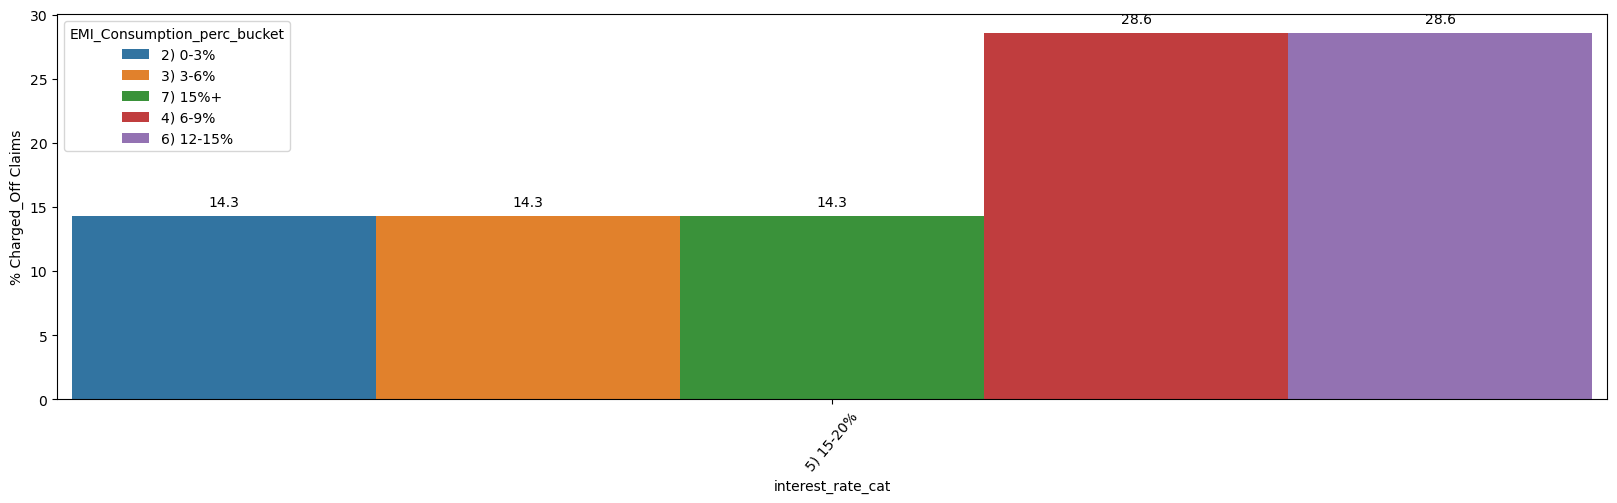

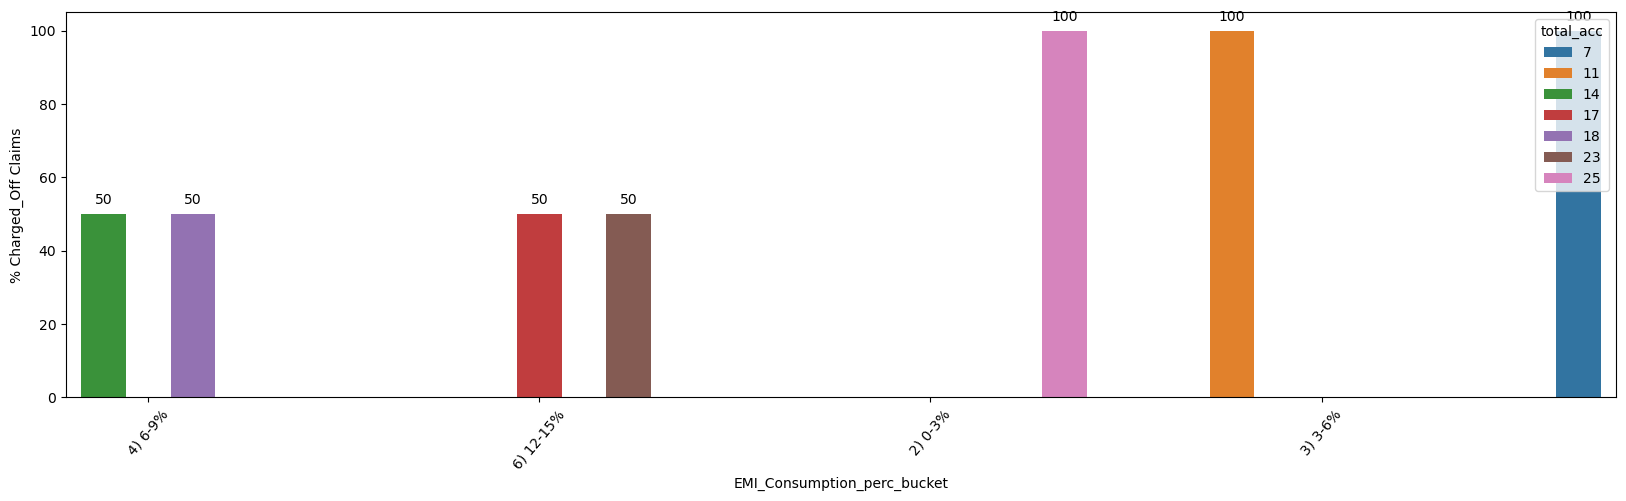

In [510]:
#Bivariant analysis on Interest_rate,term

a4=df_new_3.groupby(['interest_rate_cat','EMI_Consumption_perc_bucket']).agg({'id':'nunique'}).reset_index()
b4=a4.groupby(['interest_rate_cat']).agg({'id':'sum'})
c4=a4.merge(b4, on=['interest_rate_cat'], how='left')
c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
c4=c4.sort_values(by=['%'],ascending=True)

plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['interest_rate_cat'], y=c4['%'], hue=c4['EMI_Consumption_perc_bucket'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')

for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)


#Bivariant analysis on Interest_rate & No of accounts
    
#a4=df_new_3.groupby(['interest_rate_cat','total_acc']).agg({'id':'nunique'}).reset_index()
#b4=a4.groupby(['interest_rate_cat']).agg({'id':'sum'})
#c4=a4.merge(b4, on=['interest_rate_cat'], how='left')
#c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
#c4=c4.sort_values(by=['%'],ascending=True)

#plt.figure(figsize=(20,5))
#ax=sns.barplot(data=c4, x=c4['interest_rate_cat'], y=c4['%'], hue=c4['total_acc'])
#plt.xticks(rotation=50)
#lt.ylabel('% Charged_Off Claims')

#for container in ax.containers:
#    ax.bar_label(container, padding=5)
#    ax.margins(x=0.01)


#Bivariant analysis on No of accounts & EMI Consumption
a4=df_new_3.groupby(['EMI_Consumption_perc_bucket','total_acc']).agg({'id':'nunique'}).reset_index()
b4=a4.groupby(['EMI_Consumption_perc_bucket']).agg({'id':'sum'})
c4=a4.merge(b4, on=['EMI_Consumption_perc_bucket'], how='left')
c4['%']= round((c4['id_x']/c4['id_y'])*100,1)
c4=c4.sort_values(by=['%'],ascending=True)

plt.figure(figsize=(20,5))
ax=sns.barplot(data=c4, x=c4['EMI_Consumption_perc_bucket'], y=c4['%'], hue=c4['total_acc'])
plt.xticks(rotation=50)
plt.ylabel('% Charged_Off Claims')

for container in ax.containers:
    ax.bar_label(container, padding=5)
    ax.margins(x=0.01)

1) Those customers having an annual EMI Consumption of 6-9% & 12-15% contributes comsumption of average ~28% are more prone to default based on the annual salary.
2) Among 6-9% & 12-15% annual EMI consumption, Those who has account over 14, are the defaulters.

# The variables considered 


id, int_rate, installment, emp_length, home_ownership, annual_inc, issue_d, loan_status, year